In [18]:
import pandas as pd
df = pd.read_csv('rideshare_kaggle.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [20]:
unique_sources = df['source'].unique()
unique_destinations = df['destination'].unique()
print(unique_sources)
print(unique_destinations)

['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']
['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']


In [21]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [22]:
columns_to_drop = [
    'windGust', 'windGustTime', 'temperatureHigh', 'temperatureHighTime', 
    'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime',
    'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure',
    'windBearing', 'cloudCover', 'uvIndex', 'ozone', 'sunriseTime', 'sunsetTime',
    'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime',
    'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime',
    'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'visibility.1'
]
df = df.drop(columns_to_drop, axis='columns')

In [23]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [24]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
df = df.drop(['datetime', 'timezone', 'timestamp','icon','product_id','latitude','longitude'], axis='columns')
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [26]:
df.isnull().sum()

id                         0
hour                       0
day                        0
month                      0
source                     0
destination                0
cab_type                   0
name                       0
price                  55095
distance                   0
surge_multiplier           0
temperature                0
apparentTemperature        0
short_summary              0
long_summary               0
precipIntensity            0
precipProbability          0
humidity                   0
windSpeed                  0
visibility                 0
dtype: int64

In [27]:
df=df.dropna(subset=['price'])

In [28]:
df = df.drop(['destination','source'], axis='columns')

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   637976 non-null  object 
 1   hour                 637976 non-null  int64  
 2   day                  637976 non-null  int64  
 3   month                637976 non-null  int64  
 4   cab_type             637976 non-null  object 
 5   name                 637976 non-null  object 
 6   price                637976 non-null  float64
 7   distance             637976 non-null  float64
 8   surge_multiplier     637976 non-null  float64
 9   temperature          637976 non-null  float64
 10  apparentTemperature  637976 non-null  float64
 11  short_summary        637976 non-null  object 
 12  long_summary         637976 non-null  object 
 13  precipIntensity      637976 non-null  float64
 14  precipProbability    637976 non-null  float64
 15  humidity             6

In [32]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
categorical_cols = ['long_summary', 'short_summary', 'name']
ordinal_encoder = OrdinalEncoder()

encoded_data = ordinal_encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded_data, columns=ordinal_encoder.get_feature_names_out(categorical_cols))

df.drop(columns=categorical_cols, inplace=True)
df.reset_index(drop=True, inplace=True)

encoded_df.reset_index(drop=True, inplace=True)
df = pd.concat([df, encoded_df], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   637976 non-null  object 
 1   hour                 637976 non-null  int64  
 2   day                  637976 non-null  int64  
 3   month                637976 non-null  int64  
 4   cab_type             637976 non-null  object 
 5   price                637976 non-null  float64
 6   distance             637976 non-null  float64
 7   surge_multiplier     637976 non-null  float64
 8   temperature          637976 non-null  float64
 9   apparentTemperature  637976 non-null  float64
 10  precipIntensity      637976 non-null  float64
 11  precipProbability    637976 non-null  float64
 12  humidity             637976 non-null  float64
 13  windSpeed            637976 non-null  float64
 14  visibility           637976 non-null  float64
 15  long_summary     

In [33]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [35]:
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder
# categorical_cols = ['cab_type']
# one_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# encoded_data = one_encoder.fit_transform(df[categorical_cols])

# encoded_df = pd.DataFrame(encoded_data, columns=one_encoder.get_feature_names_out(categorical_cols))

# df.drop(columns=categorical_cols, inplace=True)
# df.reset_index(drop=True, inplace=True)

# encoded_df.reset_index(drop=True, inplace=True)

# df = pd.concat([df, encoded_df], axis=1)

# df.info()

In [36]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['cab_type']
one_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = one_encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=one_encoder.get_feature_names_out(categorical_cols))
df.drop(columns=categorical_cols, inplace=True)

df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)


df = pd.concat([df, encoded_df], axis=1)

# Display information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   637976 non-null  object 
 1   hour                 637976 non-null  int64  
 2   day                  637976 non-null  int64  
 3   month                637976 non-null  int64  
 4   price                637976 non-null  float64
 5   distance             637976 non-null  float64
 6   surge_multiplier     637976 non-null  float64
 7   temperature          637976 non-null  float64
 8   apparentTemperature  637976 non-null  float64
 9   precipIntensity      637976 non-null  float64
 10  precipProbability    637976 non-null  float64
 11  humidity             637976 non-null  float64
 12  windSpeed            637976 non-null  float64
 13  visibility           637976 non-null  float64
 14  long_summary         637976 non-null  float64
 15  short_summary    

In [37]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [38]:
df = df.drop(['id'], axis='columns')

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features and target
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
# Initialize Linear Regression Model
import numpy as np
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predicting
y_pred = model.predict(X_train_scaled)

# Metrics
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Absolute Error: 5.168819725468217
Mean Squared Error: 42.283224197398376
Root Mean Squared Error: 6.502555205255729
R^2 Score: 0.5133387234776488


In [41]:
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Absolute Error: 5.159272787252324
Mean Squared Error: 42.13113010709403
Root Mean Squared Error: 6.4908497214998
R^2 Score: 0.5167363399782146


In [42]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Create polynomial features
poly = PolynomialFeatures(degree=3) 
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Initialize and train the linear regression model on the polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly_scaled, y_train)

# Predicting
y_pred_poly = model_poly.predict(X_train_poly_scaled)

# Calculate new metrics
mae_poly = mean_absolute_error(y_train, y_pred_poly)
mse_poly = mean_squared_error(y_train, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_train, y_pred_poly)

print("Polynomial Regression Metrics")
print("Mean Absolute Error:", mae_poly)
print("Mean Squared Error:", mse_poly)
print("Root Mean Squared Error:", rmse_poly)
print("R^2 Score:", r2_poly)

Polynomial Regression Metrics
Mean Absolute Error: 3.616448778097513
Mean Squared Error: 24.944042250420836
Root Mean Squared Error: 4.994401090263059
R^2 Score: 0.7129050664030445


In [43]:
# Predicting
y_pred_poly = model_poly.predict(X_test_poly_scaled)

# Calculate new metrics
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression Metrics")
print("Mean Absolute Error:", mae_poly)
print("Mean Squared Error:", mse_poly)
print("Root Mean Squared Error:", rmse_poly)
print("R^2 Score:", r2_poly)

Polynomial Regression Metrics
Mean Absolute Error: 3.6068072720765265
Mean Squared Error: 24.7998079504916
Root Mean Squared Error: 4.9799405569235065
R^2 Score: 0.7155346669427711


In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create polynomial features
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Initialize Ridge Regression Model
ridge_model = Ridge(alpha=2.0)

# Train the model
ridge_model.fit(X_train_poly, y_train)
y_pred = ridge_model.predict(X_train_poly)

# Metrics
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)

# Print performance metrics
print("Ridge Regression Metrics")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Ridge Regression Metrics
Mean Absolute Error: 3.6151073658845467
Mean Squared Error: 24.941520160725563
Root Mean Squared Error: 4.994148592175203
R^2 Score: 0.7129340945439657


In [45]:
y_pred = ridge_model.predict(X_test_poly)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print("Ridge Regression Metrics")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Ridge Regression Metrics
Mean Absolute Error: 3.604900209238024
Mean Squared Error: 24.78934902173963
Root Mean Squared Error: 4.978890340401125
R^2 Score: 0.7156546357206258


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predicting
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# Metrics for training data
train_mae_dt = mean_absolute_error(y_train, y_train_pred_dt)
train_mse_dt = mean_squared_error(y_train, y_train_pred_dt)
train_rmse_dt = np.sqrt(train_mse_dt)
train_r2_dt = r2_score(y_train, y_train_pred_dt)

# Metrics for testing data
test_mae_dt = mean_absolute_error(y_test, y_test_pred_dt)
test_mse_dt = mean_squared_error(y_test, y_test_pred_dt)
test_rmse_dt = np.sqrt(test_mse_dt)
test_r2_dt = r2_score(y_test, y_test_pred_dt)

# Print performance metrics for both train and test sets
print("Decision Tree Regression Training Metrics")
print("Train Mean Absolute Error:", train_mae_dt)
print("Train Mean Squared Error:", train_mse_dt)
print("Train Root Mean Squared Error:", train_rmse_dt)
print("Train R^2 Score:", train_r2_dt)

print("\nDecision Tree Regression Testing Metrics")
print("Test Mean Absolute Error:", test_mae_dt)
print("Test Mean Squared Error:", test_mse_dt)
print("Test Root Mean Squared Error:", test_rmse_dt)
print("Test R^2 Score:", test_r2_dt)

Decision Tree Regression Training Metrics
Train Mean Absolute Error: 0.4094475962811566
Train Mean Squared Error: 0.8721610245331504
Train Root Mean Squared Error: 0.9338956175789404
Train R^2 Score: 0.9899618109643006

Decision Tree Regression Testing Metrics
Test Mean Absolute Error: 1.4364660938414229
Test Mean Squared Error: 5.518209394665103
Test Root Mean Squared Error: 2.3490869278647613
Test R^2 Score: 0.9367035713959301


In [47]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

def max_depth_error(md):
    # Initialize the DecisionTreeRegressor with varying max_depth
    model = DecisionTreeRegressor(max_depth=md, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Calculate errors as 1 minus the R^2 score; more commonly though, you'd use the actual error metric directly
    train_error = mean_squared_error(y_train, model.predict(X_train))
    test_error = mean_squared_error(y_test, model.predict(X_test))
    
    return {'Max Depth': md, 'Training Error': train_error, 'Test Error': test_error}

# Generate errors for a range of depth values
errors_df = pd.DataFrame([max_depth_error(md) for md in range(21, 40)])

errors_df

,Max Depth,Training Error,Test Error
0,21,1.519288,4.700877
1,22,1.396170,4.882170
2,23,1.288710,4.981964
3,24,1.197388,5.123359
4,25,1.121435,5.187625
5,26,1.059813,5.262240
6,27,1.010693,5.329589
7,28,0.972025,5.381027
8,29,0.942726,5.410010
9,30,0.922009,5.428563


In [48]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # n_estimators can be tuned

# Train the model
rf_model.fit(X_train, y_train)

# Predicting
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Metrics for training data
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_rmse_rf = np.sqrt(train_mse_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)

# Metrics for testing data
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_rmse_rf = np.sqrt(test_mse_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

# Print performance metrics for both train and test sets
print("Random Forest Regression Training Metrics")
print("Train Mean Absolute Error:", train_mae_rf)
print("Train Mean Squared Error:", train_mse_rf)
print("Train Root Mean Squared Error:", train_rmse_rf)
print("Train R^2 Score:", train_r2_rf)

print("\nRandom Forest Regression Testing Metrics")
print("Test Mean Absolute Error:", test_mae_rf)
print("Test Mean Squared Error:", test_mse_rf)
print("Test Root Mean Squared Error:", test_rmse_rf)
print("Test R^2 Score:", test_r2_rf)

Random Forest Regression Training Metrics
Train Mean Absolute Error: 0.6557961170312491
Train Mean Squared Error: 1.1459420193902927
Train Root Mean Squared Error: 1.0704868142066453
Train R^2 Score: 0.9868107123673082

Random Forest Regression Testing Metrics
Test Mean Absolute Error: 1.2676680718760538
Test Mean Squared Error: 3.7615600680776833
Test Root Mean Squared Error: 1.9394741730885934
Test R^2 Score: 0.9568531562939269


In [49]:
import numpy as np
# Metrics for training data
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_rmse_rf = np.sqrt(train_mse_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)

# Metrics for testing data
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_rmse_rf = np.sqrt(test_mse_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

# Print performance metrics for both train and test sets
print("Random Forest Regression Training Metrics")
print("Train Mean Absolute Error:", train_mae_rf)
print("Train Mean Squared Error:", train_mse_rf)
print("Train Root Mean Squared Error:", train_rmse_rf)
print("Train R^2 Score:", train_r2_rf)

print("\nRandom Forest Regression Testing Metrics")
print("Test Mean Absolute Error:", test_mae_rf)
print("Test Mean Squared Error:", test_mse_rf)
print("Test Root Mean Squared Error:", test_rmse_rf)
print("Test R^2 Score:", test_r2_rf)

Random Forest Regression Training Metrics
Train Mean Absolute Error: 0.6557961170312491
Train Mean Squared Error: 1.1459420193902927
Train Root Mean Squared Error: 1.0704868142066453
Train R^2 Score: 0.9868107123673082

Random Forest Regression Testing Metrics
Test Mean Absolute Error: 1.2676680718760538
Test Mean Squared Error: 3.7615600680776833
Test Root Mean Squared Error: 1.9394741730885934
Test R^2 Score: 0.9568531562939269


In [50]:
import numpy as np

# Create a list of random values for each feature
# Ensure these values are reasonable based on the expected ranges and types of the features
feature_values = [
    14,  # hour
    2,  # day
    4,   # month
    3,  # distance
    1.0,  # surge_multiplier
    53.0,  # temperature
    55.0,  # apparentTemperature
    0,  # precipIntensity
    0,   # precipProbability
    0.21,   # humidity
    12.0,  # windSpeed
    10.0,   # visibility
    4,   # long_summary (assuming numerical encoding or placeholder)
    0,   # short_summary (assuming numerical encoding or placeholder)
    6,   # name (assuming numerical encoding or placeholder)
    1,    # cab_type_Lyft (binary)
    0     # cab_type_Uber (binary)
]

# Convert the list to a numpy array and reshape it to be 2D
input_features = np.array(feature_values).reshape(1, -1)

# Assuming rf_model is your trained RandomForestRegressor
predicted_value = rf_model.predict(input_features)

print("Predicted Value:", predicted_value)

Predicted Value: [17.5665]


C:\Users\basil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [51]:
import joblib

joblib.dump(ordinal_encoder, 'ordinal_encoder.joblib')

joblib.dump(one_encoder, 'one_encoder.joblib')

['one_encoder.joblib']

In [52]:
import numpy as np 
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_rmse_rf = np.sqrt(train_mse_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)

# Metrics for testing data
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_rmse_rf = np.sqrt(test_mse_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

# Print performance metrics for both train and test sets
print("Random Forest Regression Training Metrics")
print("Train Mean Absolute Error:", train_mae_rf)
print("Train Mean Squared Error:", train_mse_rf)
print("Train Root Mean Squared Error:", train_rmse_rf)
print("Train R^2 Score:", train_r2_rf)

print("\nRandom Forest Regression Testing Metrics")
print("Test Mean Absolute Error:", test_mae_rf)
print("Test Mean Squared Error:", test_mse_rf)
print("Test Root Mean Squared Error:", test_rmse_rf)
print("Test R^2 Score:", test_r2_rf)

Random Forest Regression Training Metrics
Train Mean Absolute Error: 0.6557961170312491
Train Mean Squared Error: 1.1459420193902927
Train Root Mean Squared Error: 1.0704868142066453
Train R^2 Score: 0.9868107123673082

Random Forest Regression Testing Metrics
Test Mean Absolute Error: 1.2676680718760538
Test Mean Squared Error: 3.7615600680776833
Test Root Mean Squared Error: 1.9394741730885934
Test R^2 Score: 0.9568531562939269


In [53]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different sets of parameters for RandomForestRegressor
params = [
    {'n_estimators': 50, 'max_depth': 10, 'random_state': 42},
    {'n_estimators': 100, 'max_depth': 15, 'random_state': 42, 'min_samples_split': 4},
    {'n_estimators': 150, 'max_depth': 20, 'random_state': 42, 'min_samples_leaf': 2}
]

# Train a RandomForest model for each set of parameters
results = []
for param in params:
    model = RandomForestRegressor(**param)
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_error = mean_squared_error(y_train, train_preds)
    test_error = mean_squared_error(y_test, test_preds)
    results.append({
        'Model Parameters': param,
        'Training Error': train_error,
        'Testing Error': test_error
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

print(results_df)

                                    Model Parameters  Training Error  \
0  {'n_estimators': 50, 'max_depth': 10, 'random_...        2.978254   
1  {'n_estimators': 100, 'max_depth': 15, 'random...        2.344302   
2  {'n_estimators': 150, 'max_depth': 20, 'random...        1.812101   

   Testing Error  
0       3.058017  
1       3.099558  
2       3.280592  


In [54]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=100,  # number of trees
    learning_rate=0.1,  # step size shrinkage used to prevent overfitting
    max_depth=5,  # depth of trees
    subsample=0.8,  # percentage of samples used per tree
    colsample_bytree=0.8,  # percentage of features used per tree
    objective='reg:squarederror',  # loss function
    random_state=42  # seed
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predicting
y_train_pred = xgb_model.predict(X_train)
y_val_pred = xgb_model.predict(X_val)

# Metrics for training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Metrics for validation data
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Print performance metrics for both train and validation sets
print("XGBoost Regression Training Metrics")
print("Training MSE:", train_mse)
print("Training R^2:", train_r2)

print("\nXGBoost Regression Validation Metrics")
print("Validation MSE:", val_mse)
print("Validation R^2:", val_r2)

XGBoost Regression Training Metrics
Training MSE: 3.1926936916141813
Training R^2: 0.9632535026124754

XGBoost Regression Validation Metrics
Validation MSE: 3.165329372772213
Validation R^2: 0.9636921997114245


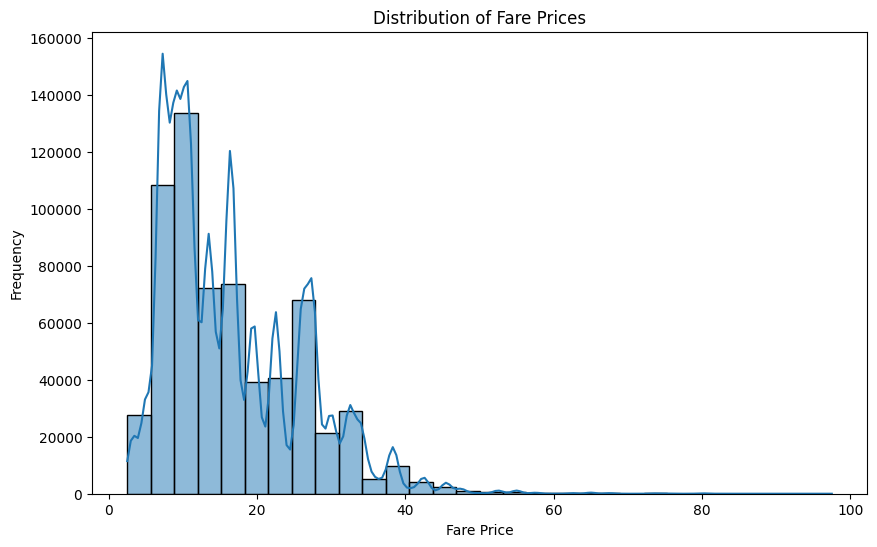

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset
df = pd.read_csv('rideshare_kaggle.csv')

# Histogram of Fare Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Fare Prices')
plt.xlabel('Fare Price')
plt.ylabel('Frequency')
plt.show()


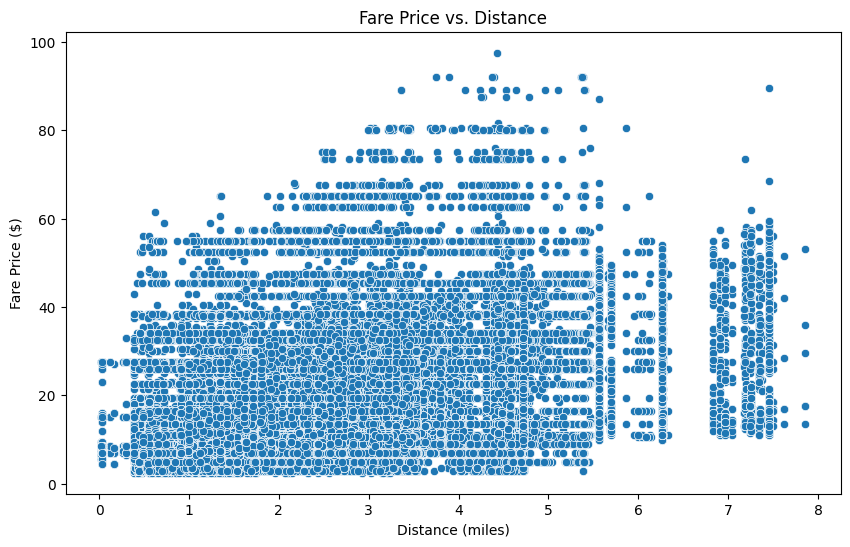

In [5]:
# Scatter Plot of Fare Prices vs. Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='price', data=df)
plt.title('Fare Price vs. Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Fare Price ($)')
plt.show()


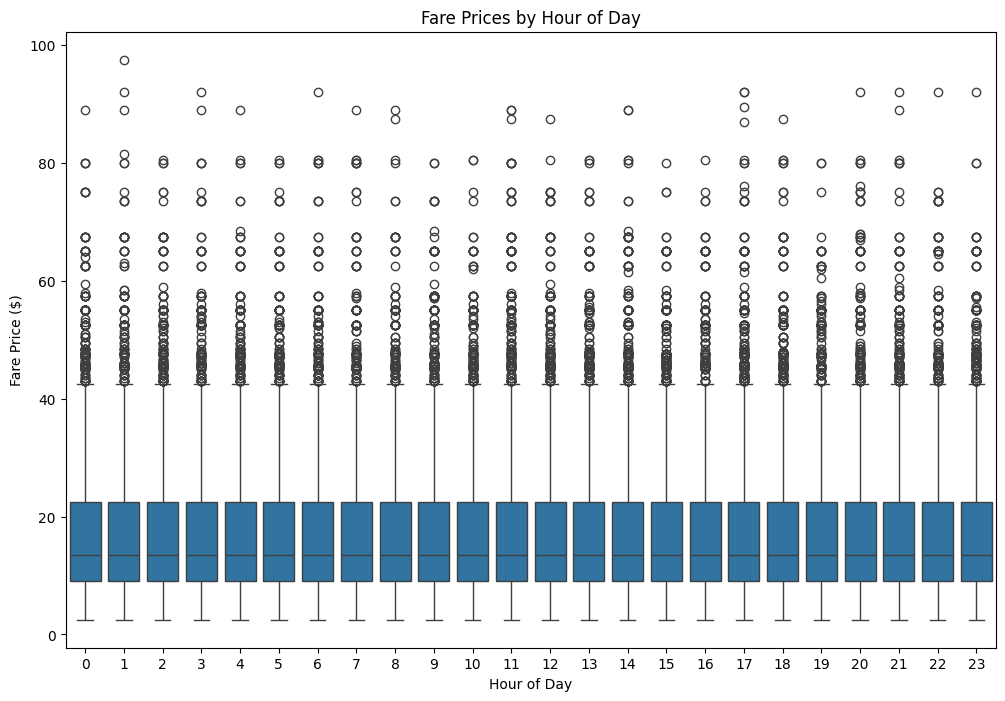

In [6]:
# Box Plot for Fare Prices by Hour of Day
plt.figure(figsize=(12, 8))
sns.boxplot(x='hour', y='price', data=df)
plt.title('Fare Prices by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fare Price ($)')
plt.show()

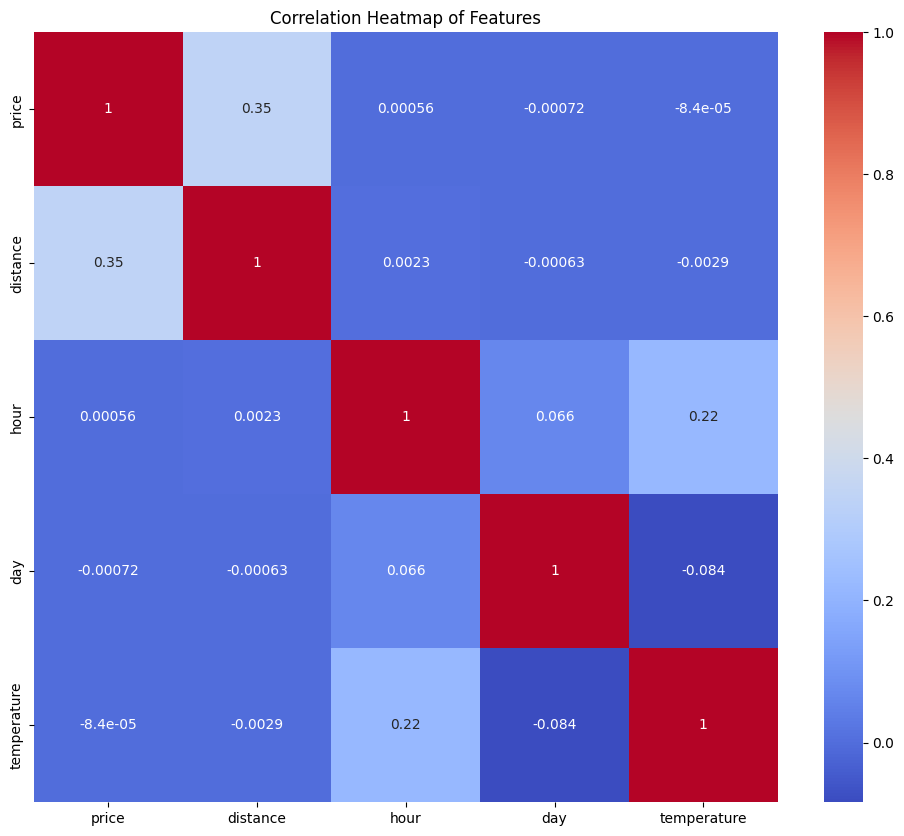

In [7]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df[['price', 'distance', 'hour', 'day', 'temperature']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

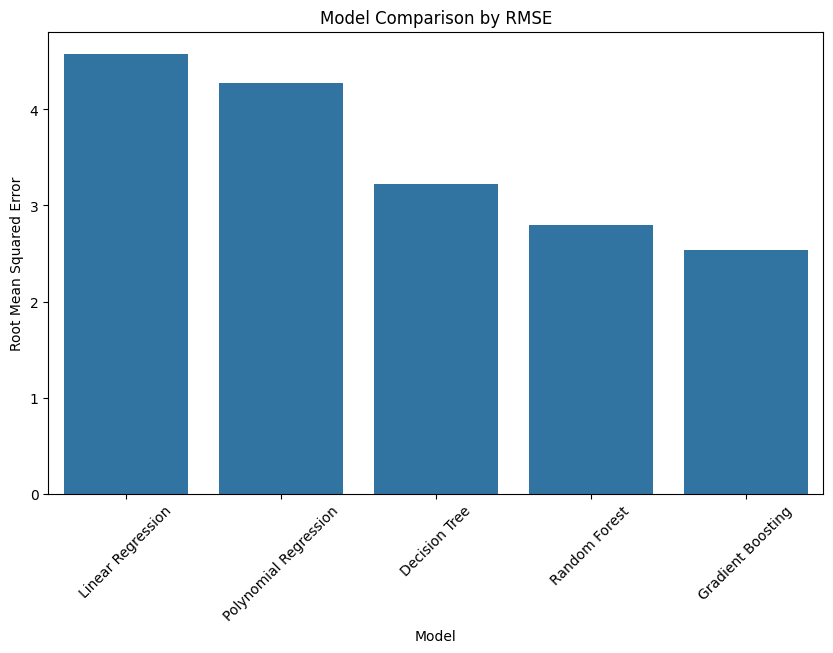

In [8]:
# Performance Metrics Bar Chart (example metrics)
metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'RMSE': [4.58, 4.28, 3.22, 2.80, 2.54]
})
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=metrics)
plt.title('Model Comparison by RMSE')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error')
plt.xticks(rotation=45)
plt.show()
